In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from advection_solver.advection_2d import tendency_2d_vanleer, tendency_2d_upwind

In [2]:
nx = 100
ny = 100
Lx = 1
Ly = 1
dx = Lx/nx
dy = Ly/ny
dt = 0.01
nt = 100

u = np.ones([nx, ny]) * 0.5 
v = np.ones([nx, ny]) * 0.3

c0 = np.zeros([nx, ny])
c0[int(ny*0.2):int(ny*0.4), int(nx*0.1):int(nx*0.3)] = 1.0  # 2D square

Text(0.5,1,'initial condition')

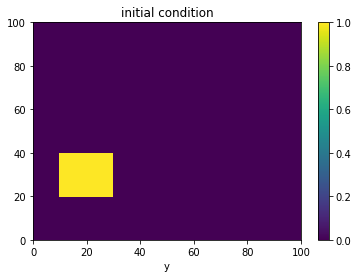

In [3]:
plt.pcolormesh(c0)
plt.xlabel('x')
plt.xlabel('y')
plt.colorbar()
plt.title('initial condition')

In [4]:
%%time
# second time will be much faster (due to jit)
c = c0.copy()
for _ in range(nt):
    c += tendency_2d_vanleer(c, u, v, dx, dy, dt)

CPU times: user 5.39 s, sys: 89.9 ms, total: 5.48 s
Wall time: 5.55 s


Text(0.5,1,'Second-order (Van-Leer)')

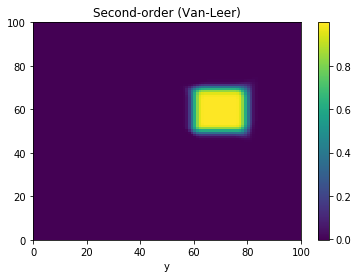

In [5]:
plt.pcolormesh(c)
plt.xlabel('x')
plt.xlabel('y')
plt.colorbar()
plt.title('Second-order (Van-Leer)')

In [6]:
%%time
# second time will be much faster (due to jit)
c = c0.copy()
for _ in range(nt):
    c += tendency_2d_upwind(c, u, v, dx, dy, dt)

CPU times: user 698 ms, sys: 7.21 ms, total: 705 ms
Wall time: 710 ms


Text(0.5,1,'Upwind')

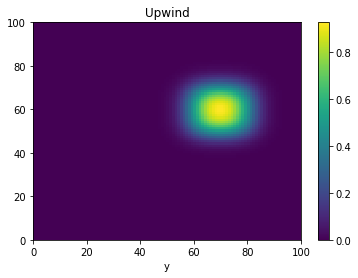

In [7]:
plt.pcolormesh(c)
plt.xlabel('x')
plt.xlabel('y')
plt.colorbar()
plt.title('Upwind')